## Summary

Before conducting a comprehensive Exploratory Data Analysis (EDA), it is essential to examine the target variables: 'Overall Rating' and 'Recommended'. These features summarize customer's satisfaction and determine client retention.

As could be expected, both variables are clearly correlated. This result is extracted from descriptive statistics, a bar chart and Pearson's correlation coefficient. Several exceptions can be observed, where reviews with high scores are then not recommended and viceversa. Special attention shoudl be given to these reviews in the future Sentiment Analysis to understand the motivation behind recommending or not in exceptional cases.

Finally, the pie chart displaying the percentage of reviews for each value of 'Overall Rating' shows how strong reviews are polarized, with almost 65% of them being rated as 1, 2, 9 or 10. Leaving a review after a flight is an optional activity, so it makes sense that customers with exceptional positive or negative experiences will be more willing to take the time and effort to do it.

## Libraries

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import scipy.stats as stats

## Data

The cleaned dataset with engineered features containing only verified reviews is stored in the 'data/interim' directory within this repository. The path has been included to run the code without further modifications.

In [3]:
df= pd.read_csv('../data/interim/verified_airlines.csv', index_col = 0)

In [4]:
df.head()

,Title,Reviews,Frequent Reviewer,Verified,Airline,Class,Type of Traveller,Route,Review Date,Flight Year,Flight Month,Quick Review,Seat Comfort,Staff Service,Food & Beverages,Inflight Entertainment,Value For Money,Overall Rating,Recommended
0,Flight was amazing,Flight was amazing. The crew onboard this fl...,0,1,Singapore Airlines,Business Class,Solo Leisure,Jakarta to Singapore,2024-03-01,2023,12,False,4,4,4,4,4,9,1
1,seats on this aircraft are dreadful,Booking an emergency exit seat still meant h...,1,1,Singapore Airlines,Economy Class,Solo Leisure,Phuket to Singapore,2024-02-21,2024,2,True,5,3,4,4,1,3,0
2,Food was plentiful and tasty,Excellent performance on all fronts. I would...,2,1,Singapore Airlines,Economy Class,Family Leisure,Siem Reap to Singapore,2024-02-20,2024,2,True,1,5,2,1,5,10,1
3,“how much food was available,Pretty comfortable flight considering I was f...,0,1,Singapore Airlines,Economy Class,Solo Leisure,Singapore to London Heathrow,2024-02-19,2024,2,True,5,5,5,5,5,10,1
4,“service was consistently good”,The service was consistently good from start ...,0,1,Singapore Airlines,Economy Class,Family Leisure,Singapore to Phnom Penh,2024-02-19,2024,2,True,5,5,5,5,5,10,1


## Overall Rating vs Recommended

To initially compare the target variables, the descriptive statistics for 'Overall Rating' segmented by recommended and not recommended reviews are displayed. It can be observed from the count of reviews that recommended and not recommended are fairly balanced. In the previous analysis (Verified vs Unverified reviews) it was already observed that verified reviews had a 52% of recommendations. The average rating is 2.32 for not recommended reviews is 2.32 and 8.55 for recommended ones. It seems logical that customers recommending an airline would provide a high overall score, while not recommending passengers would do the opposite. This can be observed in the bar chart displaying the amount of reviews for each value of Overall Rating split by Recommended. A Pearson's correlation coefficient of 0.880 indicates again a strong positive relationship. 

              count      mean       std  min  25%  50%   75%   max
Recommended                                                       
0            2976.0  2.326277  1.705570  1.0  1.0  2.0   3.0  10.0
1            3241.0  8.554767  1.653516  1.0  8.0  9.0  10.0  10.0


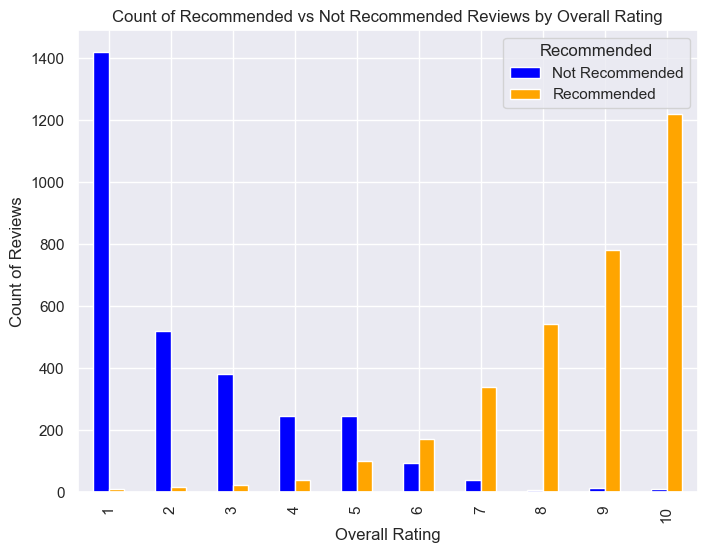

In [15]:
# Summary statistics for 'Overall Rating' vs 'Recommended'
summary_stats = df.groupby('Recommended')['Overall Rating'].describe()
print(summary_stats)

# Plotting the count of recommended and not recommended reviews by Overall Rating
pivot_table = df.pivot_table(index='Overall Rating', columns='Recommended', aggfunc='size', fill_value=0)
ax = pivot_table.plot(kind='bar', stacked=False, color=['blue', 'orange'], figsize=(8,6))
ax.set_title('Count of Recommended vs Not Recommended Reviews by Overall Rating')
ax.set_xlabel('Overall Rating')
ax.set_ylabel('Count of Reviews')
plt.legend(title='Recommended', labels=['Not Recommended', 'Recommended'])
plt.show()

In [23]:
# Correlation coefficient between 'Overall Rating' and 'Recommended'
correlation = df[['Overall Rating', 'Recommended']].corr().iloc[0, 1]
print(f"Correlation between 'Overall Rating' and 'Recommended': {correlation:.3f}")

Correlation between 'Overall Rating' and 'Recommended': 0.880


### Exceptions
Despite the strong correlation between 'Overall Rating' and 'Recommended', some exceptions exist where the rating does not align with the recommendation. In the future Sentiment Analysis it will be interesting to pay special attention to these. This could provide very meaningful insights of some customers preferences. 

In [18]:
# Count of negative (positive) reviews marked as recommended (not recommended)
rating_counts = df.groupby('Recommended')['Overall Rating'].value_counts()

low_ratings_recommended = rating_counts.loc[1, [1, 2, 3]]
high_ratings_not_recommended = rating_counts.loc[0, [8, 9, 10]]
print(f"Low ratings (1-3) recommended:\n{low_ratings_recommended}")
print(f"High ratings (8-10) not recommended:\n{high_ratings_not_recommended}")

Low ratings (1-3) recommended:
Recommended  Overall Rating
1            1                 10
             2                 17
             3                 22
Name: count, dtype: int64
High ratings (8-10) not recommended:
Recommended  Overall Rating
0            8                  7
             9                 13
             10                 9
Name: count, dtype: int64


## Percentage of reviews per Overall Rating Score
The pie chart below ilustrates the percentage of reviews across the different Overall Rating values. It shows how strongly polarized reviews are, with almost 43% of them being either 1 or 10, and almost 65% of them being either 1,2,9 or 10. This can help understand the motivation of customers when deciding to leave a review, with most of them having an exceptional positive or negative impression when doing so.

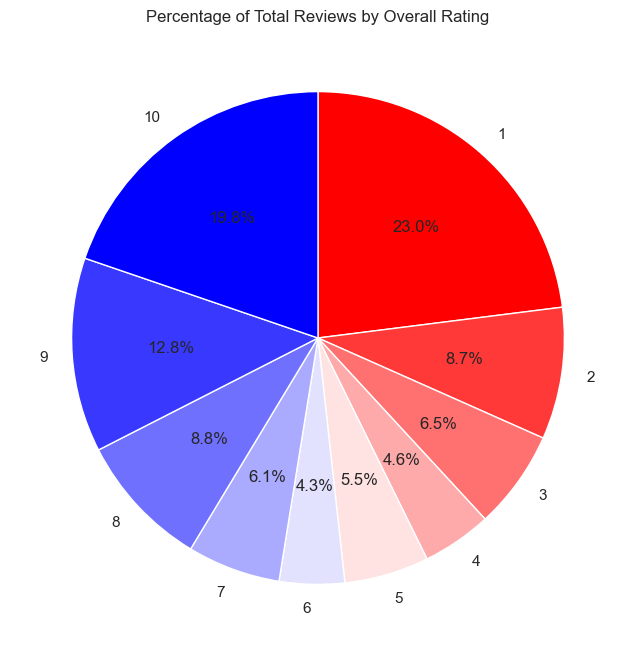

In [19]:
# Calculate the percentage of total reviews for each 'Overall Rating'
rating_counts = df['Overall Rating'].value_counts(normalize=True).sort_index() * 100

# Create a color gradient from red to blue
colors = [plt.cm.bwr(1 - i / (len(rating_counts) - 1)) for i in range(len(rating_counts))]

# Plot the pie chart
fig, ax = plt.subplots(figsize=(10, 8))
ax.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', startangle=90, counterclock=False, colors=colors)
ax.set_title('Percentage of Total Reviews by Overall Rating')
plt.show()